# Deep Learning - Practical Work 8
Student: Diego Fraile

## Exercise 1 - Deeper Models

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [19]:
def create_vgg_like_model(n_layers=4, n_filters=64, filter_size=3):
    inputs = Input(shape=(32, 32, 3))

    # Block 1
    x = Conv2D(n_filters, (filter_size, filter_size), padding='same', strides=(1, 1))(inputs)
    x = ReLU()(x)
    x = BatchNormalization()(x)

    x = Conv2D(n_filters, (filter_size, filter_size), padding='same', strides=(1, 1))(x)
    x = ReLU()(x)
    x = BatchNormalization()(x)

    x = Conv2D(n_filters, (filter_size, filter_size), padding='same', strides=(1, 1))(x)
    x = ReLU()(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = Dropout(0.2)(x)

    for _ in range(n_layers-1):
        x = Conv2D(n_filters, (filter_size, filter_size), padding='same', strides=(1, 1))(x)
        x = ReLU()(x)
        x = BatchNormalization()(x)

        x = Conv2D(n_filters, (filter_size, filter_size), padding='same', strides=(1, 1))(x)
        x = ReLU()(x)
        x = BatchNormalization()(x)

        x = Conv2D(n_filters, (filter_size, filter_size), padding='same', strides=(1, 1))(x)
        x = ReLU()(x)
        x = BatchNormalization()(x)

        x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
        x = Dropout(0.2)(x)

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)

    outputs = Dense(10, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model = create_vgg_like_model()
model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_51 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 re_lu_48 (ReLU)             (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_48 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_52 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 re_lu_49 (ReLU)             (None, 32, 32, 64)        0         
                                                           

In [10]:
# Load and prepare the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 [==============================] - 2s 0us/step


In [16]:
# Train the model
history = model.fit(
    x = x_train,
    y = y_train,
    epochs=20,
    validation_split = 0.2,
    verbose=2
)

Epoch 1/20
1250/1250 - 30s - loss: 1.6153 - accuracy: 0.4123 - val_loss: 1.7958 - val_accuracy: 0.4449 - 30s/epoch - 24ms/step
Epoch 2/20
1250/1250 - 20s - loss: 1.1511 - accuracy: 0.5949 - val_loss: 1.1486 - val_accuracy: 0.6160 - 20s/epoch - 16ms/step
Epoch 3/20
1250/1250 - 20s - loss: 0.9377 - accuracy: 0.6747 - val_loss: 0.8484 - val_accuracy: 0.7033 - 20s/epoch - 16ms/step
Epoch 4/20
1250/1250 - 20s - loss: 0.8132 - accuracy: 0.7207 - val_loss: 0.7094 - val_accuracy: 0.7526 - 20s/epoch - 16ms/step
Epoch 5/20
1250/1250 - 19s - loss: 0.7231 - accuracy: 0.7544 - val_loss: 0.7376 - val_accuracy: 0.7595 - 19s/epoch - 15ms/step
Epoch 6/20
1250/1250 - 20s - loss: 0.6512 - accuracy: 0.7807 - val_loss: 0.6513 - val_accuracy: 0.7781 - 20s/epoch - 16ms/step
Epoch 7/20
1250/1250 - 21s - loss: 0.5878 - accuracy: 0.8027 - val_loss: 0.6944 - val_accuracy: 0.7624 - 21s/epoch - 17ms/step
Epoch 8/20
1250/1250 - 20s - loss: 0.5419 - accuracy: 0.8174 - val_loss: 0.6179 - val_accuracy: 0.7926 - 20s/ep

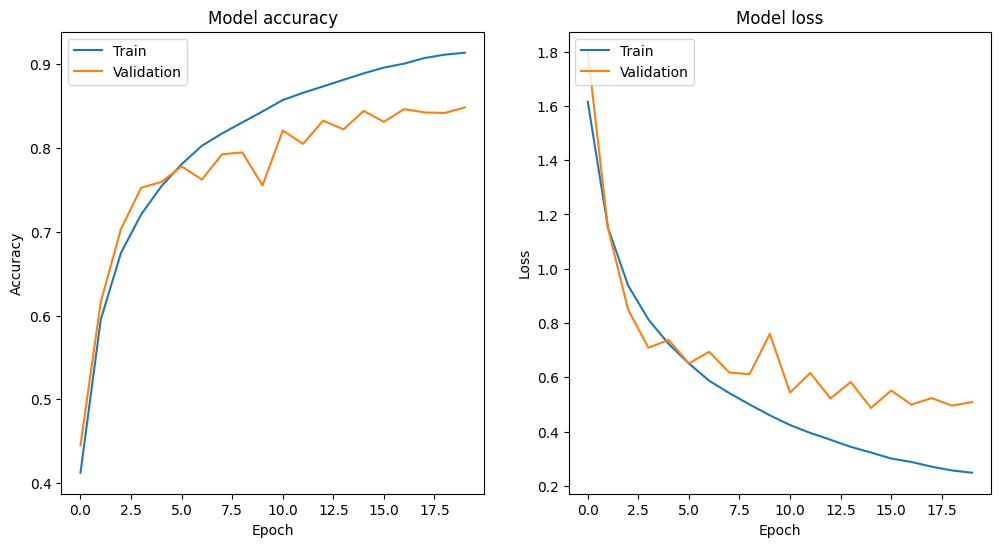

In [22]:
def plot_training(history):
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')

  # Plot training & validation loss values
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')

plot_training(history)

### Experiment with different number of layers, filters, and filter sizes

Epoch 1/20
1250/1250 - 22s - loss: 1.4520 - accuracy: 0.4899 - val_loss: 1.0744 - val_accuracy: 0.6221 - 22s/epoch - 18ms/step
Epoch 2/20
1250/1250 - 20s - loss: 0.9923 - accuracy: 0.6503 - val_loss: 0.9515 - val_accuracy: 0.6734 - 20s/epoch - 16ms/step
Epoch 3/20
1250/1250 - 16s - loss: 0.8448 - accuracy: 0.7049 - val_loss: 0.9481 - val_accuracy: 0.6767 - 16s/epoch - 13ms/step
Epoch 4/20
1250/1250 - 19s - loss: 0.7320 - accuracy: 0.7445 - val_loss: 0.7449 - val_accuracy: 0.7428 - 19s/epoch - 15ms/step
Epoch 5/20
1250/1250 - 18s - loss: 0.6491 - accuracy: 0.7752 - val_loss: 0.7039 - val_accuracy: 0.7675 - 18s/epoch - 14ms/step
Epoch 6/20
1250/1250 - 18s - loss: 0.5730 - accuracy: 0.8008 - val_loss: 0.6383 - val_accuracy: 0.7848 - 18s/epoch - 14ms/step
Epoch 7/20
1250/1250 - 16s - loss: 0.5081 - accuracy: 0.8213 - val_loss: 0.6416 - val_accuracy: 0.7913 - 16s/epoch - 12ms/step
Epoch 8/20
1250/1250 - 18s - loss: 0.4557 - accuracy: 0.8424 - val_loss: 0.6740 - val_accuracy: 0.7843 - 18s/ep

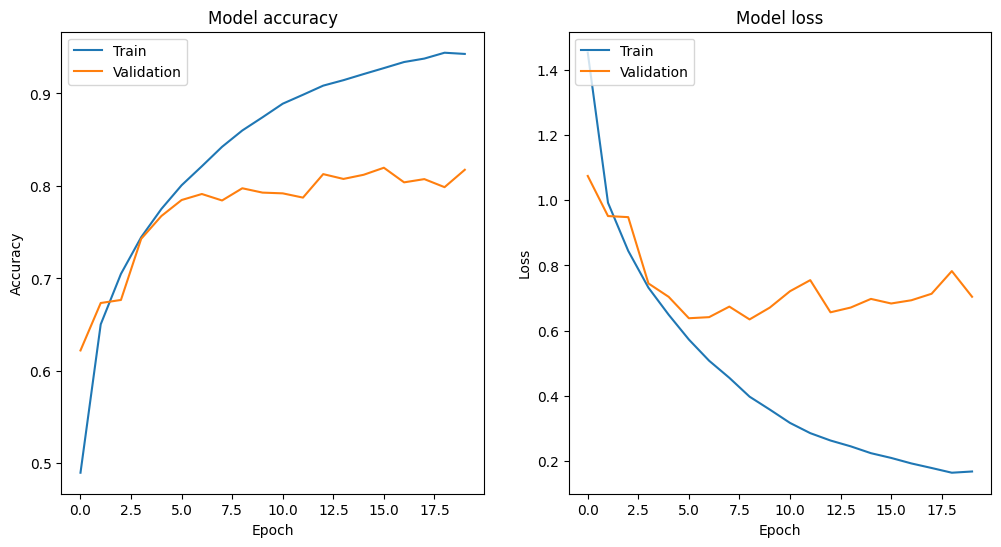

In [25]:
# Use 2 layers instead of 4
simpler_model = create_vgg_like_model(n_layers=2)

history = simpler_model.fit(
    x = x_train,
    y = y_train,
    epochs=20,
    validation_split = 0.2,
    verbose=2
)

plot_training(history)

Epoch 1/20
1250/1250 - 36s - loss: 1.6945 - accuracy: 0.3823 - val_loss: 1.6836 - val_accuracy: 0.3918 - 36s/epoch - 29ms/step
Epoch 2/20
1250/1250 - 25s - loss: 1.2176 - accuracy: 0.5709 - val_loss: 1.0743 - val_accuracy: 0.6330 - 25s/epoch - 20ms/step
Epoch 3/20
1250/1250 - 24s - loss: 0.9874 - accuracy: 0.6600 - val_loss: 0.9965 - val_accuracy: 0.6509 - 24s/epoch - 20ms/step
Epoch 4/20
1250/1250 - 25s - loss: 0.8408 - accuracy: 0.7168 - val_loss: 0.7758 - val_accuracy: 0.7333 - 25s/epoch - 20ms/step
Epoch 5/20
1250/1250 - 25s - loss: 0.7303 - accuracy: 0.7554 - val_loss: 1.0136 - val_accuracy: 0.6637 - 25s/epoch - 20ms/step
Epoch 6/20
1250/1250 - 25s - loss: 0.6458 - accuracy: 0.7851 - val_loss: 0.6817 - val_accuracy: 0.7676 - 25s/epoch - 20ms/step
Epoch 7/20
1250/1250 - 27s - loss: 0.5774 - accuracy: 0.8082 - val_loss: 0.6094 - val_accuracy: 0.7989 - 27s/epoch - 22ms/step
Epoch 8/20
1250/1250 - 25s - loss: 0.5109 - accuracy: 0.8309 - val_loss: 0.6132 - val_accuracy: 0.7992 - 25s/ep

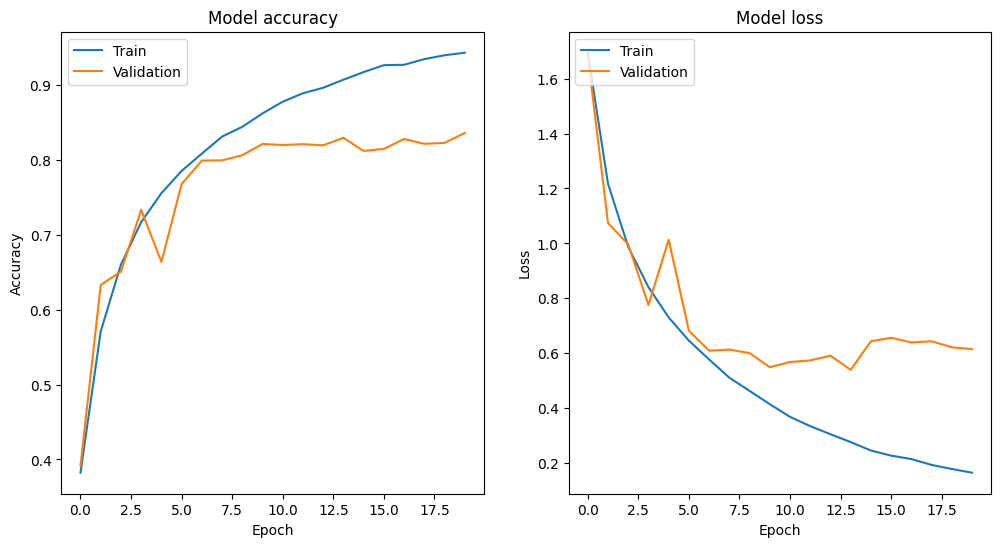

In [27]:
# Use bigger filters size
bigger_filters_model = create_vgg_like_model(filter_size=5)

history = bigger_filters_model.fit(
    x = x_train,
    y = y_train,
    epochs=20,
    validation_split = 0.2,
    verbose=2
)

plot_training(history)

Epoch 1/20
1250/1250 - 29s - loss: 1.8982 - accuracy: 0.2790 - val_loss: 1.8113 - val_accuracy: 0.3656 - 29s/epoch - 23ms/step
Epoch 2/20
1250/1250 - 18s - loss: 1.6181 - accuracy: 0.4060 - val_loss: 1.5523 - val_accuracy: 0.4360 - 18s/epoch - 15ms/step
Epoch 3/20
1250/1250 - 17s - loss: 1.4900 - accuracy: 0.4595 - val_loss: 1.3364 - val_accuracy: 0.5154 - 17s/epoch - 13ms/step
Epoch 4/20
1250/1250 - 15s - loss: 1.3848 - accuracy: 0.4999 - val_loss: 1.2725 - val_accuracy: 0.5333 - 15s/epoch - 12ms/step
Epoch 5/20
1250/1250 - 16s - loss: 1.3157 - accuracy: 0.5304 - val_loss: 1.2887 - val_accuracy: 0.5320 - 16s/epoch - 13ms/step
Epoch 6/20
1250/1250 - 15s - loss: 1.2722 - accuracy: 0.5458 - val_loss: 1.2430 - val_accuracy: 0.5481 - 15s/epoch - 12ms/step
Epoch 7/20
1250/1250 - 15s - loss: 1.2291 - accuracy: 0.5643 - val_loss: 1.1537 - val_accuracy: 0.5829 - 15s/epoch - 12ms/step
Epoch 8/20
1250/1250 - 17s - loss: 1.1940 - accuracy: 0.5764 - val_loss: 1.0843 - val_accuracy: 0.6033 - 17s/ep

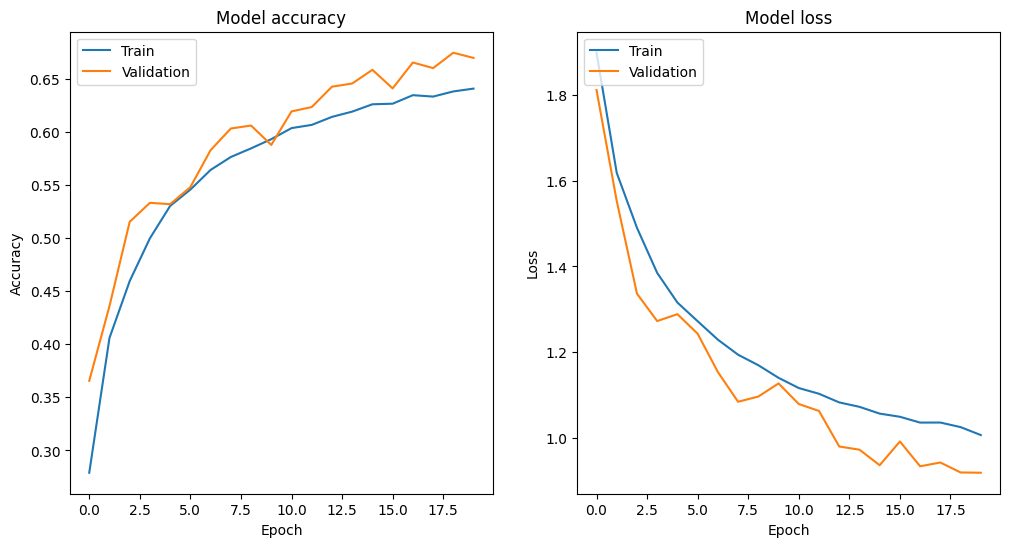

In [28]:
# Use less filters
less_filters_model = create_vgg_like_model(n_filters=10)

history = less_filters_model.fit(
    x = x_train,
    y = y_train,
    epochs=20,
    validation_split = 0.2,
    verbose=2
)

plot_training(history)

### Findings from exercise 1
- Surprisingly, with less layers, the model overfits more
- With higher filters size, the model overfits more
- With less filters, the model gives poor performance on both training and validation set (underfitting)
- Creating a deep architecture requires knowing exactly what one is doing, as a small change in the design can completely change the results

A deeper analysis would require moving these parameters together but this takes too much time on Colab's free GPUs.

## Exercise 2 - Analysis of a Deep Architecture


The main idea of Inception-v4 is to combinine the inception modules introduced in the GoogLeNet architecture that allow to use different sizes of filters in parallel to look for more or less details with the benefits from the residual connections introduced in the ResNet architecture that facilitate optimization for deeper models.
Their results show that training with residual connections accelerates the training of inception network significantly. They also demonstrate how proper activation scaling stabilizes the training of very wide residual inception networks.

## Exercise 3 - Review Questions
1. In CNNs, the early layers learn low-level features such as edges, corners, and textures. These low-level features are combined and processed by subsequent layers to detect higher-level features like shapes and object parts. This hierarchical representation allows CNNs to model the hierarchical structure of images.
2.
  - AlexNet: design a deep neural network capable of learning hierarchical features from raw image data.
  - VGGNet: explore the depth of neural networks and understand the impact of deeper architectures on performance. By using small filter sizes and stacking multiple convolutional layers, VGGNet aimed to learn more complex and abstract features from the input images.
  - GoogLeNet: address the trade-off between depth and computational efficiency. By using the inception modules, it was able to capture features at multiple scales while reducing the number of parameters.
  - ResNet: address the challenge of training very deep neural networks. By introducing residual connections, it facilitated the training of deeper networks by diminishing the degradation problem, where the performance of the network saturates or even degrades as the depth increases.